> *Alberto Ferrari* - [github](https://albertoferrari.github.io/)

In [1]:
from sklearn.datasets import load_iris      # caricamento dataset iris
import pandas as pd                         # librerie 
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()

## analisi 2d consideriamo solo le ultime due features

In [2]:
X = iris.data[:, 2:]  # solo le ultime due features
y = iris.target

## visualizzazione dei dati (grafico 2d)

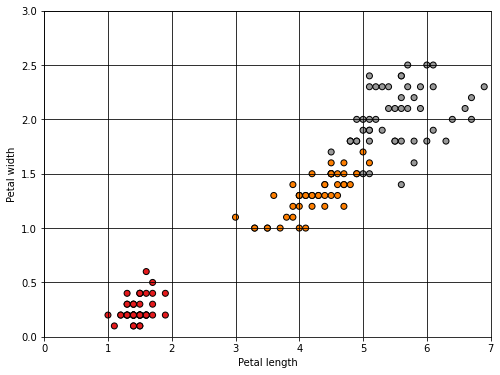

In [3]:
plt.figure(2, figsize=(8, 6))

plt.rc('grid', linestyle="-", color='black')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

x_min = y_min = 0
x_max = 7
y_max = 3
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid(True)
plt.show()

### Classificatore Support Vector Machine (SVC)

In [4]:
# Support Vector Machine
from sklearn.svm import SVC
classificatore_svm = SVC(gamma='auto', probability=True)
classificatore_svm.fit(X, y) 

SVC(gamma='auto', probability=True)

In [5]:
previsione = classificatore_svm.predict([[5.0, 1.6]])
print(previsione[0])
nome_classe = iris['target_names'][previsione[0]]
print(nome_classe)
probabilità = classificatore_svm.predict_proba([[5.0, 1.6]])
print(probabilità)

2
virginica
[[0.01051999 0.39216124 0.59731877]]


In [6]:
previsione = classificatore_svm.predict([[4.2, 2]])
print(previsione[0])
nome_classe = iris['target_names'][previsione[0]]
print(nome_classe)
probabilità = classificatore_svm.predict_proba([[4.2, 2]])
print(probabilità)

1
versicolor
[[0.01569894 0.70863533 0.27566573]]


### Training set e test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 100 training set 50 test set
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

100 100
50 50


In [8]:
classificatore_svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [9]:
print("Errori in training set")
predizioni = classificatore_svm.predict(X_train)
for elemento, predizione, classe in zip(X_train, predizioni, y_train):
  if predizione != classe:
    print(elemento, 'è classificato come', predizione, 'ma dovrebbere essere classificato ', classe) 

Errori in training set
[5.  1.7] è classificato come 2 ma dovrebbere essere classificato  1
[4.8 1.8] è classificato come 2 ma dovrebbere essere classificato  1
[5.1 1.6] è classificato come 2 ma dovrebbere essere classificato  1
[5.  1.5] è classificato come 1 ma dovrebbere essere classificato  2
[4.5 1.7] è classificato come 1 ma dovrebbere essere classificato  2


In [10]:
print("Errori in test set")
predizioni = classificatore_svm.predict(X_test)
for elemento, predizione, classe in zip(X_train, predizioni, y_train):
  if predizione != classe:
    print(elemento, 'è classificato come', predizione, 'ma dovrebbere essere classificato ', classe) 

Errori in test set
[6.6 2.1] è classificato come 0 ma dovrebbere essere classificato  2
[4.5 1.5] è classificato come 2 ma dovrebbere essere classificato  1
[1.4 0.2] è classificato come 1 ma dovrebbere essere classificato  0
[6.7 2. ] è classificato come 1 ma dovrebbere essere classificato  2
[4.1 1. ] è classificato come 0 ma dovrebbere essere classificato  1
[1.4 0.2] è classificato come 1 ma dovrebbere essere classificato  0
[1.3 0.3] è classificato come 2 ma dovrebbere essere classificato  0
[1.9 0.4] è classificato come 1 ma dovrebbere essere classificato  0
[4.2 1.3] è classificato come 0 ma dovrebbere essere classificato  1
[1.5 0.2] è classificato come 1 ma dovrebbere essere classificato  0
[4.2 1.2] è classificato come 2 ma dovrebbere essere classificato  1
[6.7 2.2] è classificato come 1 ma dovrebbere essere classificato  2
[1.4 0.2] è classificato come 1 ma dovrebbere essere classificato  0
[4.3 1.3] è classificato come 2 ma dovrebbere essere classificato  1
[5. 2.] è class

### Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, classificatore_svm.predict(X_test))
print("Confusion Matrix per Test set")
print(cm)

Confusion Matrix per Test set
[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [12]:
cm = confusion_matrix(y_train, classificatore_svm.predict(X_train))
print("Confusion Matrix per Training set")
print(cm)

Confusion Matrix per Training set
[[31  0  0]
 [ 0 32  3]
 [ 0  2 32]]


In [13]:
from sklearn.model_selection import cross_val_score
accuratezza = cross_val_score(classificatore_svm, X, y, cv=4)
print(accuratezza)

[0.97368421 0.97368421 0.94594595 1.        ]


In [14]:
np.average(accuratezza)

0.9733285917496444